<a href="https://colab.research.google.com/github/JoaoMemoria/XPe/blob/MOD1/DESAFIOMOD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [ ]:
import sklearn
import plotly
print(f''' Verificando as versões das bibliotecas \n
pandas {pd.__version__}
sklearn {sklearn.__version__}
plotly {plotly.__version__}
''')

 Verificando as versões das bibliotecas 

pandas 1.3.5
sklearn 1.0.2
plotly 5.5.0



#COLETA DE DADOS

##DOS ESTADOS

In [ ]:
# COLETA DE ESTADOS BRASILEIROS
estados = pd.read_csv('/content/drive/MyDrive/#XPe/ANO1/BCP1/MOD1/NOTEBOOKS/DESAFIO/estados_brasileiros.csv', sep=';', encoding='latin-1')
estados.head()

,cod_estado,estado,sigla_estado,pais
0,1,Acre,AC,Brasil
1,2,Alagoas,AL,Brasil
2,3,Amapá,AP,Brasil
3,4,Amazonas,AM,Brasil
4,5,Bahia,BA,Brasil


##DOS CLIENTES

In [ ]:
# COLETA DE CLIENTES
clientes = pd.read_excel('/content/drive/MyDrive/#XPe/ANO1/BCP1/MOD1/NOTEBOOKS/DESAFIO/clientes.xlsx')
clientes.head()

,cod_cliente,cod_genero,genero,idade
0,1,0,masculino,17.0
1,2,0,masculino,28.0
2,3,0,masculino,62.0
3,4,1,feminino,55.0
4,5,0,masculino,44.0


##DOS DADOS COMPLEMENTARES

In [ ]:
# COLETA DE DADOS COMPLEMENTARES
dados_complementares = pd.read_csv('/content/drive/MyDrive/#XPe/ANO1/BCP1/MOD1/NOTEBOOKS/DESAFIO/dados_complementares.csv', sep=';')
dados_complementares.head()

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
0,1,0,1502.0,1,3,1.0,5
1,2,0,9928.0,0,1,1.0,18
2,3,0,9966.0,1,4,1.0,16
3,4,0,2038.0,0,2,1.0,13
4,5,0,8216.0,1,4,1.0,13


#ANALISANDO DADOS COLETADOS

In [ ]:
#INFO BASE DE CLIENTES
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  1000 non-null   int64  
 1   cod_genero   1000 non-null   int64  
 2   genero       1000 non-null   object 
 3   idade        989 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [ ]:
#DESCRIBE BASE DE CLIENTES
clientes.describe()

,cod_cliente,cod_genero,idade
count,1000.000000,1000.000000,989.000000
mean,500.500000,0.492000,48.672396
std,288.819436,0.500186,19.286196
min,1.000000,0.000000,16.000000
25%,250.750000,0.000000,32.000000
50%,500.500000,0.000000,47.000000
75%,750.250000,1.000000,63.000000
max,1000.000000,1.000000,90.000000


In [ ]:
#INFO ESTADOS
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cod_estado    27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          27 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
#INFO DADOS COMPLEMENTARES
dados_complementares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cod_cliente  1000 non-null   int64  
 1   aposentado   1000 non-null   int64  
 2   salario      994 non-null    float64
 3   plano_saude  1000 non-null   int64  
 4   qtd_filhos   1000 non-null   int64  
 5   compras_3M   987 non-null    float64
 6   cod_estado   1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [ ]:
#DESCRIBE DADOS COMPLEMENTARES
dados_complementares.describe()

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
count,1000.000000,1000.000000,994.000000,1000.000000,1000.000000,987.000000,1000.000000
mean,500.500000,0.213000,5515.832998,0.514000,2.575000,0.555218,13.988000
std,288.819436,0.409633,2398.321322,0.500054,1.694475,0.497194,7.754611
min,1.000000,0.000000,1350.000000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,0.000000,3496.750000,0.000000,1.000000,0.000000,7.000000
50%,500.500000,0.000000,5465.500000,1.000000,3.000000,1.000000,14.000000
75%,750.250000,0.000000,7445.000000,1.000000,4.000000,1.000000,21.000000
max,1000.000000,1.000000,9997.000000,1.000000,5.000000,1.000000,27.000000


##DADOS AUSENTES

In [ ]:
#AUSENTES DE CLIENTES
clientes.isna().sum()

cod_cliente     0
cod_genero      0
genero          0
idade          11
dtype: int64

In [ ]:
#AUSENTES DE ESTADOS
estados.isna().sum()

cod_estado      0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [ ]:
#AUSENTES DE DADOS COMPLEMENTARES
dados_complementares.isna().sum()

cod_cliente     0
aposentado      0
salario         6
plano_saude     0
qtd_filhos      0
compras_3M     13
cod_estado      0
dtype: int64

##VISUALIZANDO DADOS AUSENTES

### DE CLIENTES

In [ ]:
#VISUALISANDO DADOS AUSENTES DE IDADE
clientes.loc[clientes['idade'].isnull()]

,cod_cliente,cod_genero,genero,idade
354,355,0,masculino,NaN
474,475,1,feminino,NaN
519,520,1,feminino,NaN
586,587,1,feminino,NaN
600,601,0,masculino,NaN
665,666,0,masculino,NaN
725,726,0,masculino,NaN
751,752,1,feminino,NaN
814,815,1,feminino,NaN
874,875,0,masculino,NaN


### DE DADOS COMPLEMENTARES

In [ ]:
#VISUALIZANDO DADOS AUSENTES DE SALARIO
dados_complementares.loc[dados_complementares['salario'].isnull()]

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
432,433,0,NaN,1,3,0.0,14
537,538,0,NaN,0,4,0.0,21
604,605,1,NaN,0,0,1.0,2
689,690,0,NaN,1,4,1.0,12
802,803,0,NaN,0,2,0.0,9
914,915,0,NaN,0,5,1.0,6


In [ ]:
#VISUALIZANDO DADOS AUSENTES DE COMPRAS_3M
dados_complementares.loc[dados_complementares['compras_3M'].isnull()]

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
129,130,0,9528.0,1,4,NaN,25
130,131,0,7463.0,1,3,NaN,24
252,253,0,1462.0,1,0,NaN,5
318,319,0,4082.0,0,3,NaN,9
380,381,0,5070.0,1,4,NaN,7
440,441,0,6904.0,1,1,NaN,1
441,442,0,3505.0,0,5,NaN,26
442,443,0,2588.0,1,1,NaN,23
539,540,0,9095.0,1,4,NaN,7
600,601,0,3271.0,0,2,NaN,13


## TRATAMENTO DE DADOS COLETADOS

###DROP

In [ ]:
#SALARIO -> ELIMINAR REGISTROS AUSENTES
dados_complementares_salcor = dados_complementares.dropna(subset=['salario'], inplace=False)
dados_complementares_salcor.isna().sum()

cod_cliente     0
aposentado      0
salario         0
plano_saude     0
qtd_filhos      0
compras_3M     13
cod_estado      0
dtype: int64

###FILLNA NAS COMPRAS

In [ ]:
#COMPRAS -> NAO EXISTE COMPRA PARA REGISTROS NULOS
dados_complementares_corr = dados_complementares_salcor.fillna(0, inplace=False)
dados_complementares_corr.isna().sum()

cod_cliente    0
aposentado     0
salario        0
plano_saude    0
qtd_filhos     0
compras_3M     0
cod_estado     0
dtype: int64

In [ ]:
#VERIFICAR SE DADO ANTERIORMENTE NULO FOI CORRIGIDO
dados_complementares_corr.loc[dados_complementares_corr['cod_cliente'] == 130]

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
129,130,0,9528.0,1,4,0.0,25


###MÉDIA

####IDADE DEVE SER CORRIGIDA COM MÉDIA POR GENERO

In [ ]:
#IDADE MEDIA MASCULINA
masculina = clientes.loc[(clientes['idade'].notnull()) & (clientes['genero'] == 'masculino')]
media_masculina = int(masculina['idade'].mean())
media_masculina

49

In [ ]:
#IDADE MEDIA FEMININA
feminina = clientes.loc[(clientes['idade'].notnull()) & (clientes['genero'] == 'feminino')]
media_feminina = int(feminina['idade'].mean())
media_feminina

47

In [ ]:
#CORRIGINDO IDADE MASCULINA AUSENTE
clientes.loc[(clientes['genero'] == 'masculino') & (clientes['idade'].isnull()), 'idade'] = media_masculina

In [ ]:
#VERIFICAR SE DADO ANTERIORMENTE NULO FOI CORRIGIDO
clientes.loc[clientes['cod_cliente'] == 355]

,cod_cliente,cod_genero,genero,idade
354,355,0,masculino,49.0


In [ ]:
#CORRIGINDO IDADE FEMININA AUSENTE
clientes.loc[(clientes['genero'] == 'feminino') & (clientes['idade'].isnull()), 'idade'] = media_feminina

In [ ]:
#VERIFICAR SE DADO ANTERIORMENTE NULO FOI CORRIGIDO
clientes.loc[clientes['cod_cliente'] == 475]

,cod_cliente,cod_genero,genero,idade
474,475,1,feminino,47.0


#MANIPULAÇÃO E VISUALIZAÇÃO DE DADOS

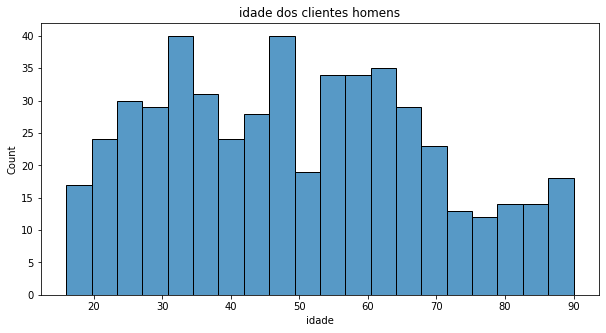

In [ ]:
#CRIANDO HISTOGRAMA BASEADO NA IDADE DOS CLIENTES MASCULINOS
plt.figure(figsize=(10,5))
plt.title('idade dos clientes homens')
sns.histplot(clientes.loc[(clientes['genero'] == 'masculino') & (clientes['idade']), 'idade'], bins=20)

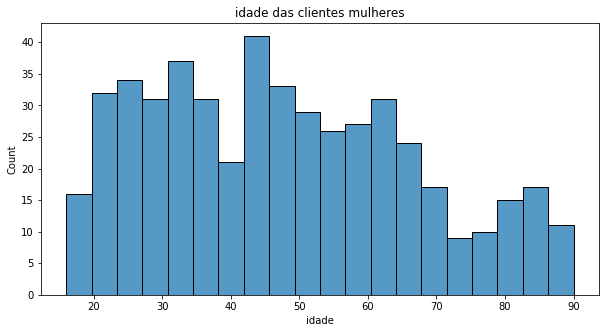

In [ ]:
#CRIANDO HISTOGRAMA BASEADO NA IDADE DOS CLIENTES FEMININOS
plt.figure(figsize=(10,5))
plt.title('idade das clientes mulheres')
sns.histplot(clientes.loc[(clientes['genero'] == 'feminino') & (clientes['idade']), 'idade'], bins=20)

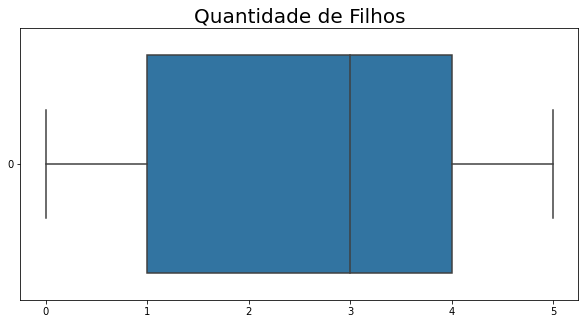

In [ ]:
#CRIANDO BLOXPOT PARA QUANTIDADE DE FILHOS
plt.figure(figsize=(10,5))
plt.title('Quantidade de Filhos', size= 20)
sns.boxplot(data = dados_complementares_corr.qtd_filhos, orient = 'h')

##JUNÇÃO DE DADOS COLETADOS

In [ ]:
#VERIFICANDO DADOS DE CLIENTES
dados_complementares_corr.head()

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado
0,1,0,1502.0,1,3,1.0,5
1,2,0,9928.0,0,1,1.0,18
2,3,0,9966.0,1,4,1.0,16
3,4,0,2038.0,0,2,1.0,13
4,5,0,8216.0,1,4,1.0,13


In [ ]:
#VERIFICANDO DADOS DE ESTADOS
estados.head()

,cod_estado,estado,sigla_estado,pais
0,1,Acre,AC,Brasil
1,2,Alagoas,AL,Brasil
2,3,Amapá,AP,Brasil
3,4,Amazonas,AM,Brasil
4,5,Bahia,BA,Brasil


###REALIZANDO JUNÇÃO ENTRE OS DATASETS

In [ ]:
dtcompl_estados = pd.merge(dados_complementares_corr, estados, on='cod_estado')
dtcompl_estados.sort_values('cod_cliente')

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,estado,sigla_estado,pais
0,1,0,1502.0,1,3,1.0,5,Bahia,BA,Brasil
27,2,0,9928.0,0,1,1.0,18,Piauí,PI,Brasil
71,3,0,9966.0,1,4,1.0,16,Paraná,PR,Brasil
115,4,0,2038.0,0,2,1.0,13,Minas Gerais,MG,Brasil
116,5,0,8216.0,1,4,1.0,13,Minas Gerais,MG,Brasil
...,...,...,...,...,...,...,...,...,...,...
369,996,1,4910.0,1,4,1.0,2,Alagoas,AL,Brasil
920,997,0,6110.0,1,3,0.0,11,Mato Grosso,MT,Brasil
263,998,0,4820.0,1,4,1.0,10,Maranhão,MA,Brasil
847,999,0,9361.0,1,1,0.0,4,Amazonas,AM,Brasil


In [ ]:
clientes_geral = pd.merge(dtcompl_estados, clientes, on= 'cod_cliente').sort_values('cod_cliente')
clientes_geral

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,estado,sigla_estado,pais,cod_genero,genero,idade
0,1,0,1502.0,1,3,1.0,5,Bahia,BA,Brasil,0,masculino,17.0
27,2,0,9928.0,0,1,1.0,18,Piauí,PI,Brasil,0,masculino,28.0
71,3,0,9966.0,1,4,1.0,16,Paraná,PR,Brasil,0,masculino,62.0
115,4,0,2038.0,0,2,1.0,13,Minas Gerais,MG,Brasil,1,feminino,55.0
116,5,0,8216.0,1,4,1.0,13,Minas Gerais,MG,Brasil,0,masculino,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,996,1,4910.0,1,4,1.0,2,Alagoas,AL,Brasil,0,masculino,69.0
920,997,0,6110.0,1,3,0.0,11,Mato Grosso,MT,Brasil,1,feminino,50.0
263,998,0,4820.0,1,4,1.0,10,Maranhão,MA,Brasil,1,feminino,61.0
847,999,0,9361.0,1,1,0.0,4,Amazonas,AM,Brasil,1,feminino,64.0


In [ ]:
#RESETANDO O INDEX DO DATA SET
clientes_geral.reset_index(drop=True)

,cod_cliente,aposentado,salario,plano_saude,qtd_filhos,compras_3M,cod_estado,estado,sigla_estado,pais,cod_genero,genero,idade
0,1,0,1502.0,1,3,1.0,5,Bahia,BA,Brasil,0,masculino,17.0
1,2,0,9928.0,0,1,1.0,18,Piauí,PI,Brasil,0,masculino,28.0
2,3,0,9966.0,1,4,1.0,16,Paraná,PR,Brasil,0,masculino,62.0
3,4,0,2038.0,0,2,1.0,13,Minas Gerais,MG,Brasil,1,feminino,55.0
4,5,0,8216.0,1,4,1.0,13,Minas Gerais,MG,Brasil,0,masculino,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,996,1,4910.0,1,4,1.0,2,Alagoas,AL,Brasil,0,masculino,69.0
990,997,0,6110.0,1,3,0.0,11,Mato Grosso,MT,Brasil,1,feminino,50.0
991,998,0,4820.0,1,4,1.0,10,Maranhão,MA,Brasil,1,feminino,61.0
992,999,0,9361.0,1,1,0.0,4,Amazonas,AM,Brasil,1,feminino,64.0


#ORGANIZAR BASE DE DADOS

In [ ]:
ordem_colunas = ['cod_cliente', 'genero', 'idade', 'qtd_filhos', 'salario', 'aposentado', 'plano_saude', 'compras_3M', 'sigla_estado', 'pais' ]
clientes_geral = clientes_geral[ordem_colunas].reset_index(drop=True)
clientes_geral.head()

,cod_cliente,genero,idade,qtd_filhos,salario,aposentado,plano_saude,compras_3M,sigla_estado,pais
0,1,masculino,17.0,3,1502.0,0,1,1.0,BA,Brasil
1,2,masculino,28.0,1,9928.0,0,0,1.0,PI,Brasil
2,3,masculino,62.0,4,9966.0,0,1,1.0,PR,Brasil
3,4,feminino,55.0,2,2038.0,0,0,1.0,MG,Brasil
4,5,masculino,44.0,4,8216.0,0,1,1.0,MG,Brasil


#CRIANDO DATAFRAME IDADE SALARIO

In [ ]:
dataframe_idade_salario = clientes_geral.iloc[:,[2,4]].values
dataframe_idade_salario[:5]

array([[  17., 1502.],
       [  28., 9928.],
       [  62., 9966.],
       [  55., 2038.],
       [  44., 8216.]])

In [ ]:
#NORMALIZAÇÃO DE DADOS
normalizar_dados = StandardScaler()
dataframe_idade_salario = normalizar_dados.fit_transform(dataframe_idade_salario)
dataframe_idade_salario[:10]

array([[-1.65517496, -1.6744435 ],
       [-1.08146493,  1.84061578],
       [ 0.69182063,  1.85646817],
       [ 0.32673243, -1.45084134],
       [-0.24697761,  1.12642382],
       [-1.65517496,  1.6291115 ],
       [-0.97715401,  1.12183497],
       [-0.97715401,  0.38595026],
       [-0.76853218, -0.1734723 ],
       [ 0.32673243, -0.0370583 ]])

##CLUSTERIZAÇÃO E WCSS

In [ ]:
#cálculo do número de clusters e WCSS

wcss_clientes_varejo = []
for i in range(1,11):
  kmeans_clientes_varejo = KMeans(n_clusters = i, random_state = 0)
  kmeans_clientes_varejo.fit(dataframe_idade_salario)
  wcss_clientes_varejo.append(kmeans_clientes_varejo.inertia_)

In [ ]:
#valores de WCSS

for i in range(len(wcss_clientes_varejo)):
  print('Cluster', i, '- Valor do WCSS:', wcss_clientes_varejo[i])

Cluster 0 - Valor do WCSS: 1987.9999999999998
Cluster 1 - Valor do WCSS: 1198.3197947848735
Cluster 2 - Valor do WCSS: 713.1813602046682
Cluster 3 - Valor do WCSS: 533.5083710793007
Cluster 4 - Valor do WCSS: 440.4768202526676
Cluster 5 - Valor do WCSS: 366.7241281394083
Cluster 6 - Valor do WCSS: 303.7445574675959
Cluster 7 - Valor do WCSS: 260.71349045076164
Cluster 8 - Valor do WCSS: 231.33906552729871
Cluster 9 - Valor do WCSS: 207.66364463170032


##KMEANS

In [ ]:
#K-Means

kmeans_clientes_varejo = KMeans(n_clusters = 4, random_state = 0)
label_cluster_clientes_varejo = kmeans_clientes_varejo.fit_predict(dataframe_idade_salario)

In [ ]:
#Classificação de clusters

label_cluster_clientes_varejo

array([2, 0, 3, 1, 0, 0, 0, 0, 2, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 1, 1, 0,
       1, 2, 1, 2, 0, 1, 3, 3, 0, 0, 3, 3, 1, 1, 0, 0, 2, 3, 1, 1, 3, 2,
       0, 1, 1, 0, 0, 1, 2, 2, 2, 3, 2, 2, 3, 2, 3, 0, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 3, 2, 1, 0, 0, 2, 3, 0, 2,
       2, 2, 2, 2, 0, 3, 0, 3, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 3, 0, 1,
       0, 1, 0, 2, 2, 0, 2, 3, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       3, 3, 1, 1, 2, 2, 0, 1, 0, 3, 0, 1, 3, 2, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 0, 1, 0, 1, 2, 3, 3, 3, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 3, 2, 0, 3, 2, 2, 2, 1, 2, 3, 3, 0, 0, 0, 2, 2,
       1, 3, 3, 0, 2, 0, 0, 3, 3, 0, 1, 2, 0, 3, 2, 1, 3, 3, 3, 0, 2, 2,
       0, 2, 2, 0, 3, 2, 0, 0, 0, 1, 1, 0, 2, 3, 0, 0, 2, 0, 0, 2, 0, 3,
       0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1, 3, 0, 0, 2, 3, 3, 0, 0, 2, 3,
       2, 0, 2, 0, 0, 3, 3, 0, 3, 3, 0, 2, 3, 0, 3, 3, 2, 0, 3, 2, 2, 3,
       0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 3, 2, 3, 1,

In [ ]:
#centroides dos Clujsters

centroides_clientes_varejo = kmeans_clientes_varejo.cluster_centers_
centroides_clientes_varejo

array([[-0.76532262,  1.0658189 ],
       [ 1.06907065, -0.91777147],
       [-0.74254407, -0.7518538 ],
       [ 0.80300659,  0.6651799 ]])

In [ ]:
#Visualização Clsters + Centroides

grafico_clientes_varejo = px.scatter(x = dataframe_idade_salario[:,0], y = dataframe_idade_salario[:,1], color = label_cluster_clientes_varejo)
grafico_centroide_clientes_varejo = px.scatter(x = centroides_clientes_varejo[:,0], y = centroides_clientes_varejo[:,1], size = [7,7,7,7])
grafico_final = go.Figure(data = grafico_clientes_varejo.data + grafico_centroide_clientes_varejo.data)
grafico_final.show()

##ATUALIZANDO DATASET COM INFO DE CLUSTERS

In [ ]:
#criação de nova coluna para clusters

clientes_geral['cluster'] = kmeans_clientes_varejo.fit_predict(dataframe_idade_salario)
clientes_geral[:5]

,cod_cliente,genero,idade,qtd_filhos,salario,aposentado,plano_saude,compras_3M,sigla_estado,pais,cluster
0,1,masculino,17.0,3,1502.0,0,1,1.0,BA,Brasil,2
1,2,masculino,28.0,1,9928.0,0,0,1.0,PI,Brasil,0
2,3,masculino,62.0,4,9966.0,0,1,1.0,PR,Brasil,3
3,4,feminino,55.0,2,2038.0,0,0,1.0,MG,Brasil,1
4,5,masculino,44.0,4,8216.0,0,1,1.0,MG,Brasil,0


##QUESTÕES DA AVALIAÇÃO/DESAFIO

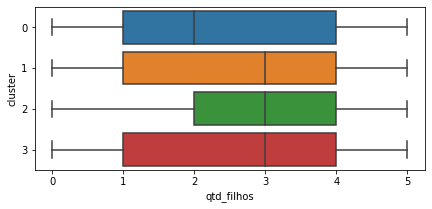

In [ ]:
#Boxplot Filhos e Cluster

plt.figure(figsize = (7,3))
sns.boxplot(x = 'qtd_filhos', y = 'cluster', data = clientes_geral, orient = 'h')

In [47]:
#Describe de salários e clusters

clientes_geral.groupby('cluster')['salario'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,260.0,8070.723077,1227.066420,5898.0,7105.75,8108.5,9155.00,9989.0
1,223.0,3315.829596,1129.714569,1371.0,2322.00,3250.0,4197.50,5538.0
2,291.0,3713.553265,1238.127173,1350.0,2689.00,3878.0,4689.00,5895.0
3,220.0,7110.345455,1195.088262,5137.0,6184.25,6982.5,7757.25,9997.0


In [48]:
#Número de clientes/cluster/gênero

clientes_geral.groupby(['cluster', 'genero'], as_index = False).agg(total = ('genero','count'))

,cluster,genero,total
0,0,feminino,135
1,0,masculino,125
2,1,feminino,99
3,1,masculino,124
4,2,feminino,149
5,2,masculino,142
6,3,feminino,105
7,3,masculino,115


In [50]:
#Media Salarial dos Estados

clientes_geral.groupby(['sigla_estado'], as_index = False).agg(media = ('salario', 'mean'))

,sigla_estado,media
0,AC,6029.666667
1,AL,5971.264706
2,AM,5881.475000
3,AP,5406.813953
4,BA,5315.370370
5,CE,5928.209302
6,DF,5492.255814
7,ES,4763.280000
8,GO,5391.078947
9,MA,4878.500000


In [51]:
#Número de aposentados/cluster

clientes_geral.groupby(['cluster', 'aposentado'], as_index = False).agg(total = ('aposentado','count'))

,cluster,aposentado,total
0,0,0,259
1,0,1,1
2,1,0,93
3,1,1,130
4,2,0,289
5,2,1,2
6,3,0,141
7,3,1,79


In [53]:
#Número de clientes possuidores de plano de saúde/estado

clientes_geral.groupby(['sigla_estado', 'plano_saude'], as_index = False).agg(total = ('plano_saude', 'count'))

,sigla_estado,plano_saude,total
0,AC,0,11
1,AC,1,22
2,AL,0,14
3,AL,1,20
4,AM,0,21
5,AM,1,19
6,AP,0,23
7,AP,1,20
8,BA,0,17
9,BA,1,10


In [54]:
#Aposentados que compraram

clientes_geral.groupby(['aposentado', 'compras_3M'], as_index = False).agg(total = ('compras_3M', 'count'))

,aposentado,compras_3M,total
0,0,0.0,355
1,0,1.0,427
2,1,0.0,94
3,1,1.0,118


In [55]:
#Aposentados do gênero masculino que efetuaram compras/cluster

clientes_geral.groupby(['cluster', 'aposentado', 'genero', 'compras_3M'], as_index = True).agg(total = ('compras_3M', 'count'))

total
cluster aposentado genero    compras_3M       
0       0          feminino  0.0            59
                             1.0            75
                   masculino 0.0            55
                             1.0            70
        1          feminino  0.0             1
1       0          feminino  0.0            20
                             1.0            23
                   masculino 0.0            23
                             1.0            27
        1          feminino  0.0            25
                             1.0            31
                   masculino 0.0            34
                             1.0            40
2       0          feminino  0.0            81
                             1.0            67
                   masculino 0.0            54
                             1.0            87
        1          feminino  1.0             1
                   masculino 1.0             1
3       0          feminino  0.0            40
                             1.0            28
                   masculino 0.0            23
                             1.0            50
        1          feminino  0.0            10
                             1.0            27
                   masculino 0.0            24
                             1.0            18

In [56]:
#Describe filhos/cluster/gênero

clientes_geral.groupby(['cluster', 'genero'])['qtd_filhos'].describe()

count      mean       std  min  25%  50%  75%  max
cluster genero                                                       
0       feminino   135.0  2.437037  1.664410  0.0  1.0  3.0  4.0  5.0
        masculino  125.0  2.312000  1.733987  0.0  1.0  2.0  4.0  5.0
1       feminino    99.0  2.616162  1.765353  0.0  1.0  3.0  4.0  5.0
        masculino  124.0  2.556452  1.716976  0.0  1.0  3.0  4.0  5.0
2       feminino   149.0  2.932886  1.605162  0.0  2.0  3.0  4.0  5.0
        masculino  142.0  2.598592  1.676114  0.0  1.0  3.0  4.0  5.0
3       feminino   105.0  2.447619  1.663991  0.0  1.0  2.0  4.0  5.0
        masculino  115.0  2.608696  1.730509  0.0  1.0  3.0  4.0  5.0